# Dataset con:-
#id : station identification code
#date : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
#element : indicator of element type
#TMAX : Maximum temperature (tenths of degrees C)
#TMIN : Minimum temperature (tenths of degrees C)
#value : data value for element (tenths of degrees C)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv('Temp_data.csv')
print(df.head())

            ID        Date Element  Data_Value
0  USW00094889  2014-11-12    TMAX          22
1  USC00208972  2009-04-29    TMIN          56
2  USC00200032  2008-05-26    TMAX         278
3  USC00205563  2005-11-11    TMAX         139
4  USC00200230  2014-02-27    TMAX        -106


# Tasks:-
##write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.

##Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.




In [2]:
df  = df.sort_values(['ID','Date'])
##Pre process the data 
df['Year'] = df['Date'].apply(lambda x:x[:4]) 
df['Month_day'] = df['Date'].apply(lambda x: x[5:])  
df = df[df['Month_day']!='02-29']  ##removing leap year
print(df.tail())

                ID        Date Element  Data_Value  Year Month_day
84041  USW00094889  2015-12-29    TMAX          50  2015     12-29
50750  USW00094889  2015-12-30    TMAX           6  2015     12-30
50751  USW00094889  2015-12-30    TMIN          -5  2015     12-30
61120  USW00094889  2015-12-31    TMAX          -5  2015     12-31
61135  USW00094889  2015-12-31    TMIN         -21  2015     12-31


# Select min and max temp value for all date's except 2015

In [3]:
df_min = df[(df['Element']=='TMIN') & (df['Year']!='2015')]

##select max temp from all date's except 2015 year

df_max = df[(df['Element']=='TMAX')&(df['Year']!='2015')]
print(df_min.tail())

                ID        Date Element  Data_Value  Year Month_day
29072  USW00094889  2014-12-27    TMIN          -5  2014     12-27
58292  USW00094889  2014-12-28    TMIN         -60  2014     12-28
56612  USW00094889  2014-12-29    TMIN        -110  2014     12-29
60944  USW00094889  2014-12-30    TMIN        -105  2014     12-30
45681  USW00094889  2014-12-31    TMIN        -138  2014     12-31


# Now for all same date's with diffrent year select min and max value
like 1 jan comes 14time's in between 20

In [6]:
##Taking the min and max value like here we have 14 year record's for each single date so we take mean for all 14 values
import numpy as np
temp_min = df_min.groupby('Month_day')['Data_Value'].agg({'temp_mini':'min'})
temp_max = df_max.groupby('Month_day')['Data_Value'].agg({'temp_maxi':'max'})
print(temp_min.head())
print(temp_max.head())

           temp_mini
Month_day           
01-01           -160
01-02           -267
01-03           -267
01-04           -261
01-05           -150
           temp_maxi
Month_day           
01-01            156
01-02            139
01-03            133
01-04            106
01-05            128


C:\Users\IamChamp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\IamChamp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


# Now Work On 2015 Data

In [7]:
temp_15_min = df[(df['Element']=='TMIN') & (df['Year']=='2015')]
temp_15_max = df[(df['Element']=='TMAX')& (df['Year']=='2015')]
print(temp_15_min.head())

                ID        Date Element  Data_Value  Year Month_day
44224  USC00200032  2015-01-01    TMIN         -94  2015     01-01
48658  USC00200032  2015-01-02    TMIN         -33  2015     01-02
14851  USC00200032  2015-01-03    TMIN         -39  2015     01-03
10461  USC00200032  2015-01-04    TMIN         -67  2015     01-04
2337   USC00200032  2015-01-05    TMIN        -144  2015     01-05


# Perform Min And  Max Function 

In [9]:
temp_min_15 = temp_15_min.groupby('Month_day')['Data_Value'].agg({'temp_mini_15':'min'})
temp_max_15 = temp_15_max.groupby('Month_day')['Data_Value'].agg({'temp_maxi_15':'max'})
print(temp_min_15.head())
print(temp_max_15.head())

           temp_mini_15
Month_day              
01-01              -133
01-02              -122
01-03               -67
01-04               -88
01-05              -155
           temp_maxi_15
Month_day              
01-01                11
01-02                39
01-03                39
01-04                44
01-05                28


C:\Users\IamChamp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.
C:\Users\IamChamp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


# Reset Index

In [10]:
temp_min = temp_min.reset_index()
temp_max = temp_max.reset_index()
temp_min_15 = temp_min_15.reset_index()
temp_max_15 = temp_max_15.reset_index()

# Get Broken Min And Max Point

In [12]:
broken_min = (temp_min_15[temp_min_15['temp_mini_15'] < temp_min['temp_mini']]).index.tolist()
broken_max = (temp_max_15[temp_max_15['temp_maxi_15'] > temp_max['temp_maxi']]).index.tolist()
print(broken_min)
print(broken_max)

[4, 10, 33, 44, 45, 46, 47, 49, 50, 51, 53, 54, 55, 56, 57, 58, 63, 64, 65, 86, 87, 88, 113, 114, 139, 183, 239, 289, 290, 291, 292, 313]
[39, 106, 126, 127, 130, 137, 207, 209, 230, 249, 250, 258, 259, 260, 270, 271, 292, 305, 306, 307, 308, 309, 321, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 356, 357, 358, 359]


# Plotting figure

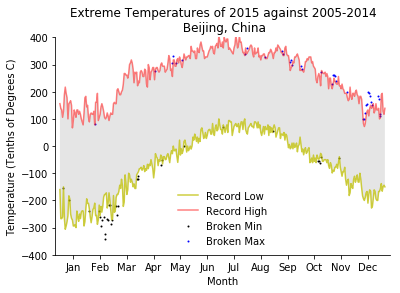

In [15]:
plt.figure()

plt.plot(temp_min['temp_mini'], 'y', alpha = 0.75, label = 'Record Low')
plt.plot(temp_max['temp_maxi'], 'r', alpha = 0.5, label = 'Record High')


plt.scatter(broken_min, temp_min_15['temp_mini_15'].iloc[broken_min], s = 1, c = 'k', label = 'Broken Min')
plt.scatter(broken_max, temp_max_15['temp_maxi_15'].iloc[broken_max], s = 1, c = 'b', label = 'Broken Max')

plt.xlabel('Month')
plt.ylabel('Temperature (Tenths of Degrees C)')
plt.title('Extreme Temperatures of 2015 against 2005-2014\n Beijing, China')

plt.gca().fill_between(range(len(temp_min)), 
                       temp_min['temp_mini'], temp_max['temp_maxi'], 
                       facecolor='grey', 
                       alpha=0.2)

plt.gca().axis([-5, 370, -400, 400])
plt.legend(frameon = False)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

a = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
b = [i+15 for i in a]

Month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(b, Month_name)
plt.show()